# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [115]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

lat = []
long = []
temp = []
humidity = []
foundcities = []
cloud = []
wind = []
tempmax = []

#for city in cities[:25]:
for i in range(len(cities)):
    
    #print(query_url+city)
    response = requests.get(query_url + cities[i]).json()
    
    try:
        response['coord']
    except:
        print(f'{i} {cities[i]} not found. Continuing.')
        continue
        
    #print(type(response))
    #print(json.dumps(response, indent=4))
    
    lat.append(response['coord']['lat'])
    long.append(response['coord']['lon'])
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    foundcities.append(response['name'])
    cloud.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])
    tempmax.append(response['main']['temp_max'])
    
    print(i, cities[i])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

        
#     except:
#         continue
 

0 minas
1 samusu not found. Continuing.
2 rikitea
3 mayo
4 severo-kurilsk
5 rabo de peixe
6 bushehr
7 karkaralinsk not found. Continuing.
8 talnakh
9 port lincoln
10 ushuaia
11 busselton
12 hermanus
13 albany
14 hobart
15 yar-sale
16 provideniya
17 chuy
18 saint-philippe
19 illoqqortoormiut not found. Continuing.
20 grindavik
21 barentsburg not found. Continuing.
22 new norfolk
23 nikolskoye
24 hasaki
25 nichinan
26 san andres
27 danville
28 tuatapere
29 amderma not found. Continuing.
30 taolanaro not found. Continuing.
31 saskylakh
32 noyabrsk
33 khatanga
34 punta arenas
35 kapaa
36 denpasar
37 tuktoyaktuk
38 mataura
39 torbay
40 dukat
41 saint-georges
42 upernavik
43 butembo
44 port elizabeth
45 mareeba
46 lermontovka
47 fort nelson
48 thompson
49 geraldton
50 inhambane
51 cayenne
52 arraial do cabo
53 coahuayana
54 anchorage
55 sorong
56 coquimbo
57 victoria
58 port alfred
59 namatanai
60 wollongong
61 lebu
62 doctor pedro p. pena not found. Continuing.
63 taunggyi
64 cape town
65 s

540 bow island
541 sao joao da barra
542 nouadhibou
543 kuusamo
544 moose factory
545 canico
546 la ronge
547 tungkang not found. Continuing.
548 canals
549 kongolo
550 komsomolskiy
551 portobelo
552 chokwe
553 tamulte not found. Continuing.
554 srikakulam
555 jiddah not found. Continuing.
556 brownsville
557 roald
558 havelock
559 aban
560 mikkeli
561 honningsvag
562 chunskiy
563 senanga
564 tres picos
565 nhulunbuy
566 san jose
567 petropavlovsk-kamchatskiy
568 saleilua not found. Continuing.
569 correntina
570 krasnoshchekovo
571 canmore
572 kodinsk
573 gaoua
574 olaine
575 ambodifototra not found. Continuing.
576 arica
577 indiana
578 chuzhou
579 msowero
580 pacific grove
581 harper
582 jinxiang
583 nipawin
584 balkhash
585 vaitape
586 berbera
587 mikuni
588 perelyub
589 burdinne
590 sovetskiy
591 rawannawi not found. Continuing.
592 nacala
593 ati
594 kingsport
595 sibu
596 lodja
The latitude information received is: [-34.38, -23.12, 38.89, 50.68, 37.8, 28.97, 69.49, -34.73, -54.8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [116]:
#make the dataframe using a dictionary
# create a data frame from cities, lat, long, temp, and humidity
weather_dict = {
    "city": foundcities,
    "lat": lat,
    "long": long,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloud,
    "windspeed": wind,
    "max temp": tempmax
}
weather_data = pd.DataFrame(weather_dict)
weather_data
# print(len(foundcities))
# print(len(lat))
# print(len(long))
# print(len(temp))
# print(len(humidity))

,city,lat,long,temp,humidity,cloudiness,windspeed,max temp
0,Minas,-34.38,-55.24,8.93,70,75,6.20,9.00
1,Rikitea,-23.12,-134.97,20.70,69,28,10.31,20.70
2,Mayo,38.89,-76.51,24.72,78,1,1.50,26.11
3,Severo-Kuril'sk,50.68,156.12,8.41,90,100,2.47,8.41
4,Rabo de Peixe,37.80,-25.58,18.18,77,40,3.10,18.33
...,...,...,...,...,...,...,...,...
539,Nacala,-14.54,40.67,18.16,91,5,3.99,18.16
540,Ati,13.22,18.34,29.73,46,19,4.87,29.73
541,Kingsport,36.55,-82.56,25.48,74,75,2.10,27.22
542,Sibu,2.30,111.82,25.00,94,40,3.10,25.00


In [117]:
#export to csv
#.to_csv('filepath/name')
weather_data.to_csv('output_data/weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [118]:
#open the dataframe from the saved CSV to use consistent data
opened_df = pd.read_csv('output_data/weather_data.csv', index_col ='Unnamed: 0')
opened_df

,city,lat,long,temp,humidity,cloudiness,windspeed,max temp
0,Minas,-34.38,-55.24,8.93,70,75,6.20,9.00
1,Rikitea,-23.12,-134.97,20.70,69,28,10.31,20.70
2,Mayo,38.89,-76.51,24.72,78,1,1.50,26.11
3,Severo-Kuril'sk,50.68,156.12,8.41,90,100,2.47,8.41
4,Rabo de Peixe,37.80,-25.58,18.18,77,40,3.10,18.33
...,...,...,...,...,...,...,...,...
539,Nacala,-14.54,40.67,18.16,91,5,3.99,18.16
540,Ati,13.22,18.34,29.73,46,19,4.87,29.73
541,Kingsport,36.55,-82.56,25.48,74,75,2.10,27.22
542,Sibu,2.30,111.82,25.00,94,40,3.10,25.00


In [119]:
#  Get the indices of cities that have humidity over 100%.
#create empty list
index_list = []

#create for loop to add hum=100 indices to the list
for i in range(len(opened_df)):
    if humidity[i] > 100:
        index_list.append(i)
        #print(f'This is {i}')
    
print(f'Here is a list of indices where humidity is > 100: {index_list}')    
#len(opened_df)

Here is a list of indices where humidity is > 100: []


In [120]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# not necessary

In [121]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv

# not necessary

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

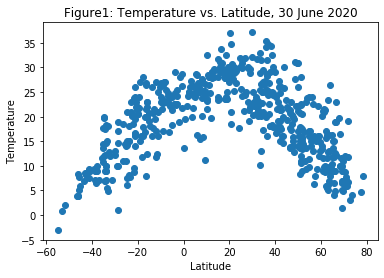

In [122]:
# set x and y values
x_values = opened_df['lat']
y_values = opened_df['temp']

# create scatter plot
plt.scatter(x_values, y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Temperature')

plt.title(label="Figure1: Temperature vs. Latitude, 30 June 2020")

#Save as png
plt.savefig('Images/Figure1.png')

# Show plot
plt.show()



## Latitude vs. Humidity Plot

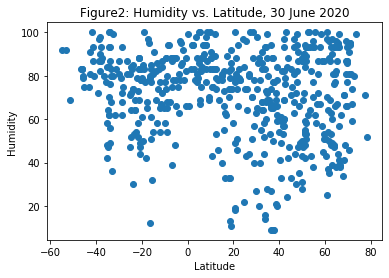

In [123]:
# set x and y values
x_values = opened_df['lat']
y_values = opened_df['humidity']

# create scatter plot
plt.scatter(x_values, y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.title(label="Figure2: Humidity vs. Latitude, 30 June 2020")

#Save as png
plt.savefig('Images/Figure2.png')

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

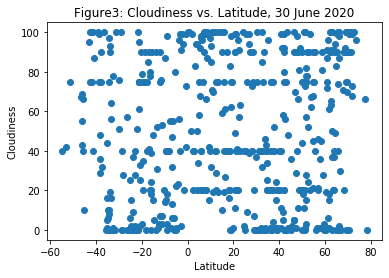

In [124]:
# set x and y values
x_values = opened_df['lat']
y_values = opened_df['cloudiness']

# create scatter plot
plt.scatter(x_values, y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.title(label="Figure3: Cloudiness vs. Latitude, 30 June 2020")

#Save as png
plt.savefig('Images/Figure3.png')

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

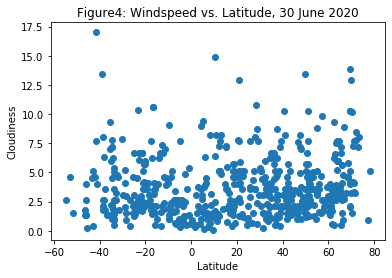

In [128]:
# set x and y values
x_values = opened_df['lat']
y_values = opened_df['windspeed']

# create scatter plot
plt.scatter(x_values, y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.title(label="Figure4: Windspeed vs. Latitude, 30 June 2020")

#Save as png
plt.savefig('Images/Figure4.png')

# Show plot
plt.show()

## Linear Regression

In [129]:
# OPTIONAL: Create a function to create Linear Regression plots

In [130]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = opened_df[(opened_df['lat'] > 0)]
northern_df

,city,lat,long,temp,humidity,cloudiness,windspeed,max temp
2,Mayo,38.89,-76.51,24.72,78,1,1.50,26.11
3,Severo-Kuril'sk,50.68,156.12,8.41,90,100,2.47,8.41
4,Rabo de Peixe,37.80,-25.58,18.18,77,40,3.10,18.33
5,Bushehr,28.97,50.84,29.75,57,0,0.58,29.75
6,Talnakh,69.49,88.40,11.00,66,70,2.00,11.00
...,...,...,...,...,...,...,...,...
537,Burdinne,50.58,5.08,13.94,87,20,4.60,14.00
538,Sovetskiy,61.36,63.58,9.81,64,6,0.61,9.81
540,Ati,13.22,18.34,29.73,46,19,4.87,29.73
541,Kingsport,36.55,-82.56,25.48,74,75,2.10,27.22


In [131]:
southern_df = opened_df[(opened_df['lat'] <= 0)]
southern_df

,city,lat,long,temp,humidity,cloudiness,windspeed,max temp
0,Minas,-34.38,-55.24,8.93,70,75,6.20,9.00
1,Rikitea,-23.12,-134.97,20.70,69,28,10.31,20.70
7,Port Lincoln,-34.73,135.87,12.00,64,6,7.81,12.00
8,Ushuaia,-54.80,-68.30,-3.00,92,40,2.60,-3.00
9,Busselton,-33.65,115.33,5.46,80,64,1.47,6.11
...,...,...,...,...,...,...,...,...
524,Arica,-18.48,-70.30,16.00,77,90,3.10,16.00
527,Msowero,-6.53,37.20,16.92,78,55,0.59,16.92
533,Vaitape,-16.52,-151.75,26.88,79,80,10.60,26.88
539,Nacala,-14.54,40.67,18.16,91,5,3.99,18.16


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

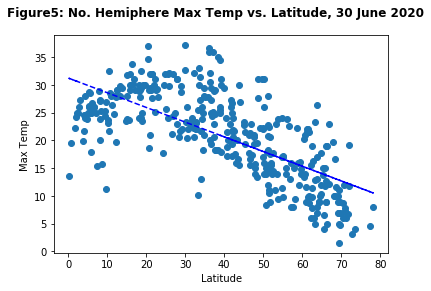

In [139]:
# # set x and y values
# x_values = northern_df['lat']
# y_values = northern_df['max temp']

# # create scatter plot
# plt.scatter(x_values, y_values)

# # Label plot
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')

# plt.title(label="Figure5: So. Hemiphere Max Temp vs. Latitude, 30 June 2020")

# #Save as png
# #plt.savefig('Images/Figure4.png')

# # Show plot
# plt.show()

# find the fit line: y = mx + b
x_axis = northern_df['lat']
y_values = northern_df['max temp']
(slope, intercept, _, _, _) = linregress(x_axis, y_values)
fit = slope * x_axis + intercept

# graph the line and the scatter plot together using subplot()
fig, ax = plt.subplots()
fig.suptitle("Figure5: No. Hemiphere Max Temp vs. Latitude, 30 June 2020", fontsize=12, fontweight="bold")

# ax.set_xlim(min(capomulin_avg_df["Weight (g)"])-1, max(capomulin_avg_df["Weight (g)"])+1)
# ax.set_ylim(min(capomulin_avg_df["Tumor Volume (mm3)"])-1, max(capomulin_avg_df["Tumor Volume (mm3)"])+1)

ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temp")

ax.plot(x_axis, y_values, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

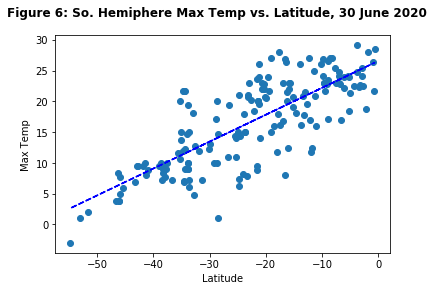

In [140]:
# find the fit line: y = mx + b
x_axis = southern_df['lat']
y_values = southern_df['max temp']
(slope, intercept, _, _, _) = linregress(x_axis, y_values)
fit = slope * x_axis + intercept

# graph the line and the scatter plot together using subplot()
fig, ax = plt.subplots()

fig.suptitle("Figure 6: So. Hemiphere Max Temp vs. Latitude, 30 June 2020", fontsize=12, fontweight="bold")

# ax.set_xlim(min(capomulin_avg_df["Weight (g)"])-1, max(capomulin_avg_df["Weight (g)"])+1)
# ax.set_ylim(min(capomulin_avg_df["Tumor Volume (mm3)"])-1, max(capomulin_avg_df["Tumor Volume (mm3)"])+1)

ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temp")

ax.plot(x_axis, y_values, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

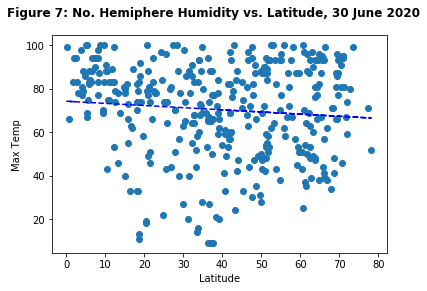

In [141]:
# find the fit line: y = mx + b
x_axis = northern_df['lat']
y_values = northern_df['humidity']
(slope, intercept, _, _, _) = linregress(x_axis, y_values)
fit = slope * x_axis + intercept

# graph the line and the scatter plot together using subplot()
fig, ax = plt.subplots()

fig.suptitle("Figure 7: No. Hemiphere Humidity vs. Latitude, 30 June 2020", fontsize=12, fontweight="bold")

# ax.set_xlim(min(capomulin_avg_df["Weight (g)"])-1, max(capomulin_avg_df["Weight (g)"])+1)
# ax.set_ylim(min(capomulin_avg_df["Tumor Volume (mm3)"])-1, max(capomulin_avg_df["Tumor Volume (mm3)"])+1)

ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temp")

ax.plot(x_axis, y_values, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

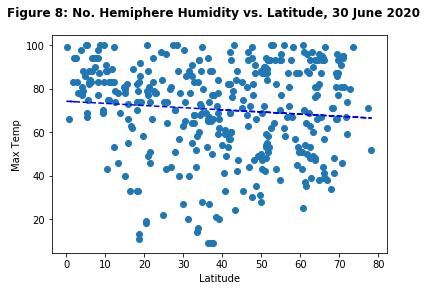

In [142]:
# find the fit line: y = mx + b
x_axis = northern_df['lat']
y_values = northern_df['humidity']
(slope, intercept, _, _, _) = linregress(x_axis, y_values)
fit = slope * x_axis + intercept

# graph the line and the scatter plot together using subplot()
fig, ax = plt.subplots()

fig.suptitle("Figure 8: No. Hemiphere Humidity vs. Latitude, 30 June 2020", fontsize=12, fontweight="bold")

# ax.set_xlim(min(capomulin_avg_df["Weight (g)"])-1, max(capomulin_avg_df["Weight (g)"])+1)
# ax.set_ylim(min(capomulin_avg_df["Tumor Volume (mm3)"])-1, max(capomulin_avg_df["Tumor Volume (mm3)"])+1)

ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temp")

ax.plot(x_axis, y_values, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression